<a href="https://colab.research.google.com/github/jayabban/Data-Science/blob/main/Cancer_Dataset_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


In [3]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Prof Simon DataSet/Cancer_dataset'
train_data = os.path.join(base_dir, 'train')
test_data = os.path.join(base_dir, 'test')

#Trainning dir

norm_train = os.path.join(train_data, 'normal')
astrophic_train = os.path.join(train_data, 'astrophic')
non_polyb_train = os.path.join(train_data, 'non-polybs')
non_ulcer_train = os.path.join(train_data, 'non-ulcer')
non_astrophic_train = os.path.join(train_data, 'non-astrophic')

#Test dir

norm_test = os.path.join(test_data, 'normal')
astrophic_test = os.path.join(test_data, 'astrophic')
non_polyb_test = os.path.join(test_data, 'non-polybs')
non_ulcer_test = os.path.join(test_data, 'non-ulcer')
non_astrophic_test = os.path.join(test_data, 'non-astrophic')

#No of Train set
norm_train_dir = len(os.listdir(norm_train))
astrophic_train_dir = len(os.listdir(astrophic_train))
non_polyb_train_dir = len(os.listdir(non_polyb_train))
non_ulcer_train_dir = len(os.listdir(non_ulcer_train))
non_astrophic_train_dir = len(os.listdir(non_astrophic_train))


#No of Test set
norm_test_dir = len(os.listdir(norm_train))
astrophic_test_dir = len(os.listdir(astrophic_test))
non_polyb_test_dir = len(os.listdir(non_polyb_test))
non_ulcer_test_dir = len(os.listdir(non_ulcer_test))
non_astrophic_test_dir = len(os.listdir(non_astrophic_test))

total_train = norm_train_dir + astrophic_train_dir + non_polyb_train_dir + non_ulcer_train_dir + non_astrophic_train_dir
total_test = norm_test_dir + astrophic_test_dir + non_polyb_test_dir + non_ulcer_test_dir + non_astrophic_test_dir



In [4]:
print('total training normal images:', norm_train_dir)
print('total training astrophic images:', astrophic_train_dir)
print('total training non_polybs images:', non_polyb_train_dir)
print('total training ulcer-train images:', non_ulcer_train_dir)
print('total training nos-astrophic images:', non_astrophic_train_dir)

total training normal images: 30
total training astrophic images: 10
total training non_polybs images: 10
total training ulcer-train images: 10
total training nos-astrophic images: 10


In [5]:
print('total test normal images:', norm_test_dir)
print('total test astrophic images:', astrophic_test_dir)
print('total test non_polybs images:', non_polyb_test_dir)
print('total test ulcer-train images:', non_ulcer_test_dir)
print('total test nos-astrophic images:', non_astrophic_test_dir)

total test normal images: 30
total test astrophic images: 7
total test non_polybs images: 7
total test ulcer-train images: 7
total test nos-astrophic images: 7


In [6]:
print('total training dataset:', total_train)
print('total test dataset:', total_test)

total training dataset: 70
total test dataset: 58


Train, Test and Validation Set Generation

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range =45,
                                   width_shift_range=.15,
                                   height_shift_range=.15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip = False,
                                   horizontal_flip = True)
print(train_datagen)

Validation Generator -(Preprocessing)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_datagen = train_datagen.flow_from_directory(batch_size=5,
                                                  directory = train_data,
                                                  shuffle = True,
                                                  target_size =(150,150),
                                                  class_mode ='binary',
                                                  color_mode='rgb')
test_datagen = test_datagen.flow_from_directory(batch_size=5,
                                                directory=test_data,
                                                target_size=(150,150),
                                                class_mode = 'binary',
                                                color_mode ='rgb')

Found 70 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [10]:
def classLabel(source=None):
  datagen = ImageDataGenerator(rescale=1./255)
  data_generator = datagen.flow_from_directory(
      source)
  class_dictionary = data_generator.class_indices
  return data_generator, class_dictionary

labels = classLabel(train_data)
print(labels)

Found 70 images belonging to 5 classes.
(<keras.src.preprocessing.image.DirectoryIterator object at 0x784948c3cdc0>, {'astrophic': 0, 'non-astrophic': 1, 'non-polybs': 2, 'non-ulcer': 3, 'normal': 4})


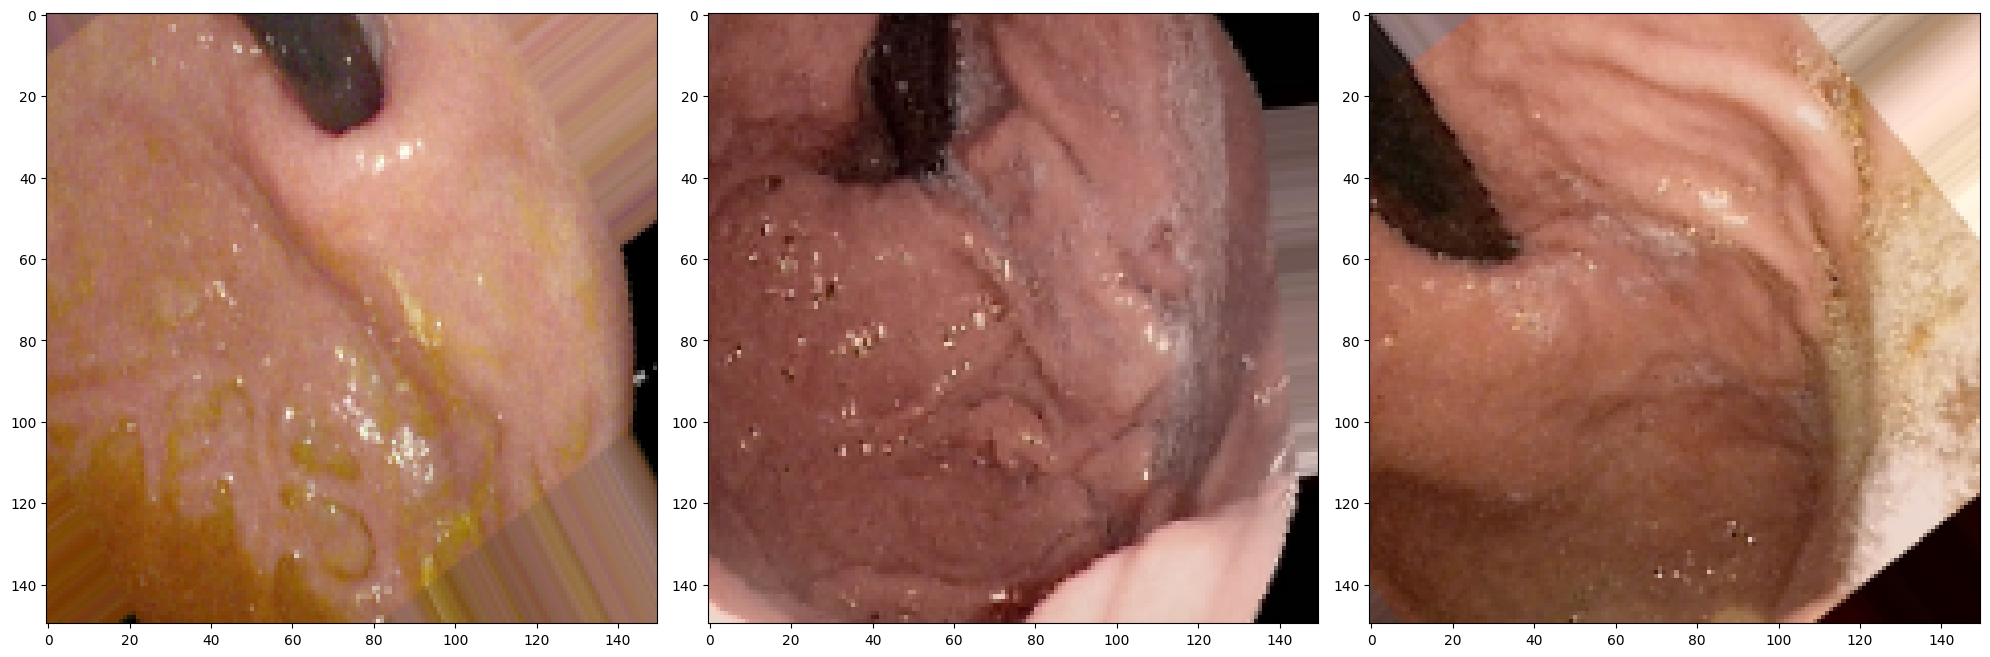

In [11]:
sample_train_image, _ = next(train_datagen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1,3, figsize=(20,20))
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_train_image[:3])

# Building the CNN

In [12]:
from tensorflow import keras
cnn = tf.keras.models.Sequential()

Convolution

In [13]:
cnn.add(tf.keras.layers.Conv2D(16,3, padding='same', activation='relu', input_shape=(150,150,3)))

Pooling

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.4))

Adding Second Convolution layer


In [15]:
cnn.add(tf.keras.layers.Conv2D(32,3, padding='same', activation='relu', input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(32,3, padding='same', activation='relu', input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [16]:
cnn.add(Dropout(0.4))

Flatten

In [17]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [18]:
cnn.add(tf.keras.layers.Dense(units=500, activation='relu'))
cnn.add(Dropout(0.1))

Output Layer

In [19]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

Compiling the model

```
# This is formatted as code
```



In [20]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9

building the trainning test

In [22]:
history = cnn.fit(x = train_datagen, validation_data = test_datagen, steps_per_epoch= 3, epochs = 100, validation_steps = 3, verbose= 2)

Epoch 1/100
3/3 - 5s - loss: 2.6109 - accuracy: 0.2000 - val_loss: 1.5142 - val_accuracy: 0.2667 - 5s/epoch - 2s/step
Epoch 2/100
3/3 - 4s - loss: 1.9814 - accuracy: 0.1333 - val_loss: 1.6584 - val_accuracy: 0.2000 - 4s/epoch - 1s/step
Epoch 3/100
3/3 - 3s - loss: 1.4312 - accuracy: 0.3333 - val_loss: 1.5776 - val_accuracy: 0.4667 - 3s/epoch - 882ms/step
Epoch 4/100
3/3 - 1s - loss: 1.3512 - accuracy: 0.7333 - val_loss: 1.5904 - val_accuracy: 0.2667 - 1s/epoch - 379ms/step
Epoch 5/100
3/3 - 1s - loss: 1.5414 - accuracy: 0.4000 - val_loss: 1.5304 - val_accuracy: 0.4000 - 1s/epoch - 487ms/step
Epoch 6/100
3/3 - 1s - loss: 1.4707 - accuracy: 0.3333 - val_loss: 1.4348 - val_accuracy: 0.5333 - 1s/epoch - 393ms/step
Epoch 7/100
3/3 - 2s - loss: 1.3351 - accuracy: 0.5333 - val_loss: 1.5378 - val_accuracy: 0.5333 - 2s/epoch - 588ms/step
Epoch 8/100
3/3 - 2s - loss: 1.4742 - accuracy: 0.4000 - val_loss: 1.5084 - val_accuracy: 0.3333 - 2s/epoch - 661ms/step
Epoch 9/100
3/3 - 1s - loss: 1.3397 - 

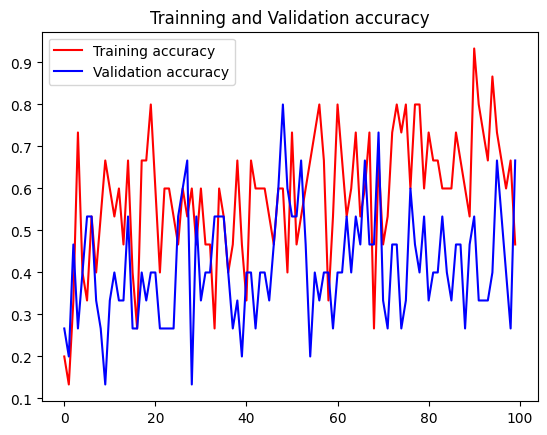

<Figure size 640x480 with 0 Axes>

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Trainning and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [25]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Prof Simon DataSet/Cancer_dataset/single_predict/non-astrop1.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
train_datagen.class_indices
if result[0][0] > 0.5:
    prediction = 'non-astrophic'
else:
    prediction = 'normal'
print(prediction)

1/1 [==============================] - 0s 31ms/step
non-astrophic
